## Deep-Learning-on-Photometric-Supernova-Dust-Detection

https://mfouesneau.github.io/docs/pyphot/

In [1]:
pip install git+https://github.com/mfouesneau/pyphot

  Cloning https://github.com/mfouesneau/pyphot to /tmp/pip-req-build-anjzr20r
  Running command git clone -q https://github.com/mfouesneau/pyphot /tmp/pip-req-build-anjzr20r
  Created wheel for pyphot: filename=pyphot-1.0-cp37-none-any.whl size=10776534 sha256=a1985eed3f17f55e5225291efadd3a62ac6191510a664ca6cc87272703a4da66
  Stored in directory: /tmp/pip-ephem-wheel-cache-zqikkfsy/wheels/2b/77/88/66bec8dcf25244e020936064d08507ceeddd629a7448abc31c
Successfully built pyphot
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tables

     |████████████████████████████████| 4.3MB 2.9MB/s eta 0:00:01█████████████▎              | 2.3MB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 163kB 59.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

     |████████████████████████████████| 516.2MB 17kB/s  eta 0:00:011                             | 9.1MB 2.9MB/s eta 0:02:55 10.0MB 2.9MB/s eta 0:02:55MB/s eta 0:02:54                    | 14.2MB 2.9MB/s eta 0:02:53MB/s eta 0:02:52   |█▎                              | 20.6MB 2.9MB/s eta 0:02:51   |█▌                              | 23.7MB 2.9MB/s eta 0:02:50[K     |█▊                              | 28.3MB 2.9MB/s eta 0:02:48     |██                              | 30.7MB 2.9MB/s eta 0:02:47        | 32.3MB 37.7MB/s eta 0:00:13 eta 0:00:13        | 36.4MB 37.7MB/s eta 0:00:1313:00:13| 53.9MB 37.7MB/s eta 0:00:13                         | 59.6MB 37.7MB/s eta 0:00:13�                            | 62.9MB 37.7MB/s eta 0:00:13                     | 67.1MB 37.7MB/s eta 0:00:12�                           | 69.7MB 37.7MB/s eta 0:00:12.7MB 40.0MB/s eta 0:00:12                     | 77.9MB 40.0MB/s eta 0:00:11�████                           | 81.2MB 40.0MB/s eta 0:00:11███▍                         

In [4]:
pip install keras

     |████████████████████████████████| 378kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 6.4MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
#import all local functions
%run src/GenerateSyntheticData
%run src/PlotSample_SyntheticData
%run src/photoBands_fromSpectra
%run src/photometry_filters
%run src/PlotSample_PhotometricBands
%run src/photo_classification_dust
%run src/photo_regression_dust
%run src/Preprocessing_newSpectra

Using TensorFlow backend.


The idea in this approach is to predict the existance of dust in supernova based on the JWST photometric bands first, then estimate the amount of dust in the objects that are assigned as  dust containing ones.

## Generate Synthetic Data

In [5]:
####Import a local script
# %run src/GenerateSyntheticData

In [6]:
#####This cell needs to run once to generate synthetic data with
#####the following range of parameters(i.e.temperature and radius of Supernova, temperature and mass of dust)


#####generate 10000 Modified black body fitting curves for SNe with dust
#len_withDust=10000
# tempSNlist_with_dust= np.random.random_integers(7000,10000,len_withDust)
# radiusSNlist_with_dust= np.random.random_integers(1000,20000,len_withDust)
# tempDustlist_with_dust= np.random.random_integers(8000,20000,len_withDust)
# massDustlist_with_dust= np.random.random_integers(1000,100000,len_withDust)


#####generate 2000 Modified black body fitting curves for SNe without dust
#len_withoutDust=10000
# tempSNlist_without_dust = np.random.random_integers(7000, 10000, len_withoutDust)
# radiusSNlist_without_dust = np.random.random_integers(1000, 20000, len_withoutDust)  
# tempDustlist_without_dust = np.ones((len_withoutDust, 1))  
# massDustlist_without_dust = np.ones((len_withoutDust, 1)) 

# gen(tempSNlist_with_dust, radiusSNlist_with_dust, tempDustlist_with_dust, massDustlist_with_dust,
#     tempSNlist_without_dust ,radiusSNlist_without_dust ,tempDustlist_without_dust , massDustlist_without_dust)

## Sample of Generated data

In [7]:
generated_data=pd.read_pickle("SyntheticData/generated_data_random_v1.pkl") #it will take time to read the Synthetic data

In [8]:
####Import a local script
# %run src/PlotSample_SyntheticData

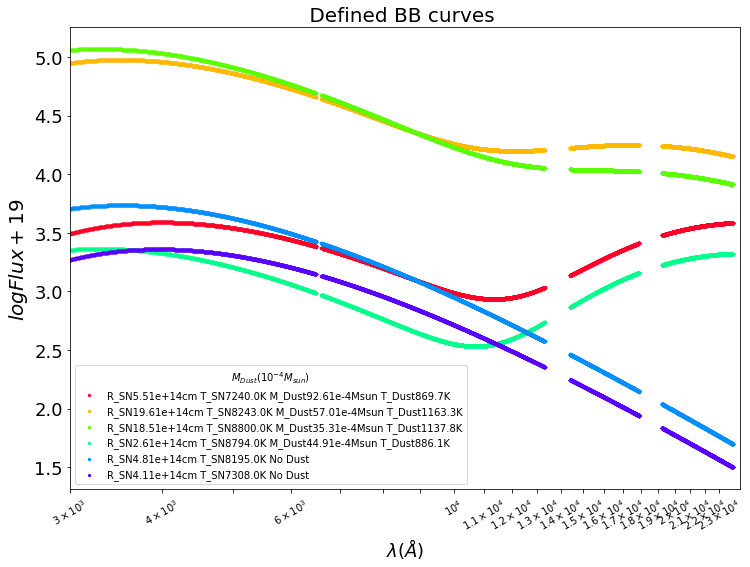

In [9]:
index_list= [1000, 2000, 3000, 4000,10000,11000]#must be less than 12,000
plot_sample(generated_data,index_list)

## Extracting JWST photometric bands from simulated spectra with "pyphot"

In [10]:
####Import a local script
# %run src/photoBands_fromSpectra
# %run src/photometry_filters

In [16]:
#####This cell needs to run once to generate photometric bands of JWST for synthetic data



# # data=pd.read_pickle("SyntheticData/generated_data_random.pkl")
data=generated_data

# data["wavelength_um"]= (data["wavelength"] /1e+4)
# wavelength_um=data["wavelength_um"]
# wavelength=data["wavelength"]
# flux=data["generated_fluxes"]


# survey_name="JWST" #excluding F150W2 band
# len_data=len(data)
# filter_logflux_, filters_clWL_=define_filters_flux(survey_name, wavelength, wavelength_um, flux, len_data)
# logflux=filter_logflux_.T
# logflux.to_pickle("SyntheticData/log-JWSTbands.pkl")

Sample of JWST photometric bands

In [12]:
####Import a local script
# %run src/PlotSample_PhotometricBands

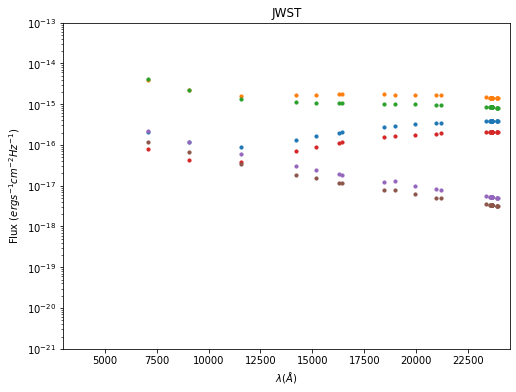

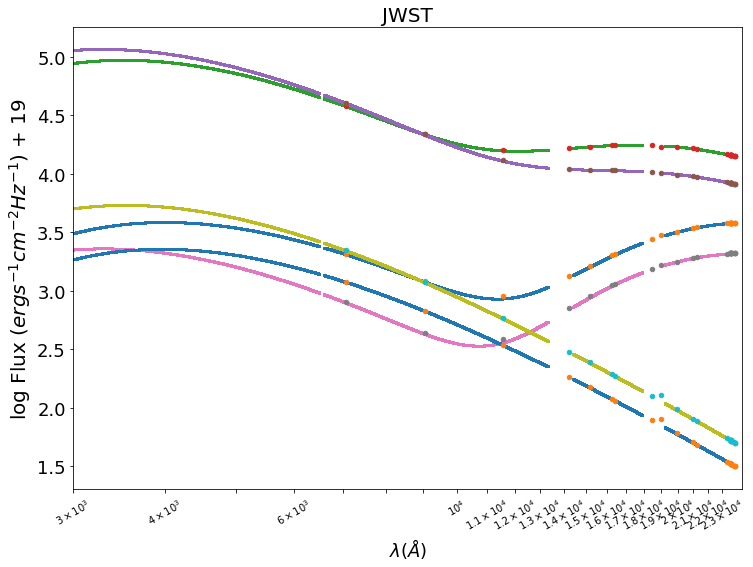

In [12]:
data=generated_data

data["wavelength_um"]= (data["wavelength"] /1e+4)
wavelength_um=data["wavelength_um"]
wavelength=data["wavelength"]
flux=data["generated_fluxes"]

survey_name="JWST" #excluding F150W2 band
index_list=[1000, 2000, 3000, 4000, 10000, 11000] #must be less than 12,000

# filter_names=define_filters_name(survey_name, wavelength,wavelength_um, flux)
filter_plot(survey_name, wavelength, wavelength_um, flux, index_list)


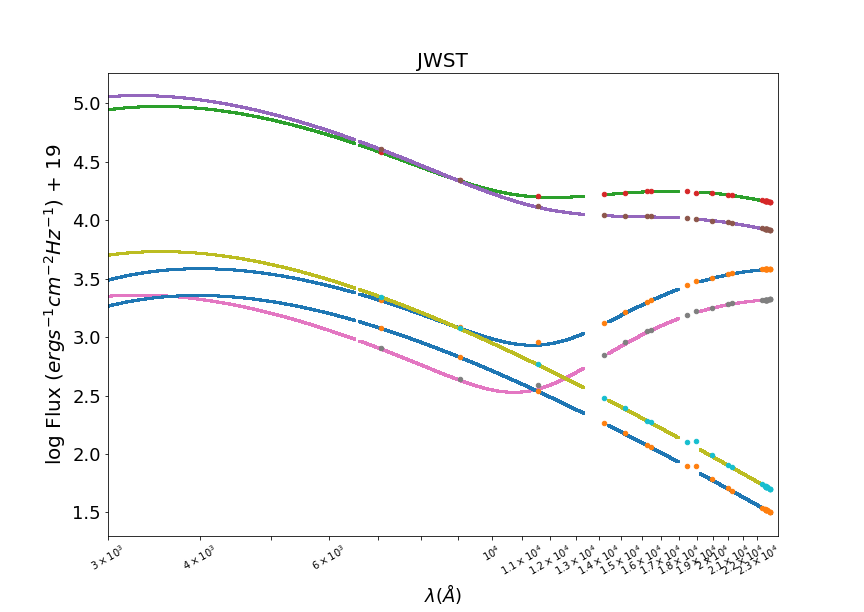

In [13]:
from IPython.display import Image 

# Image("Photometric_SamplePlot/Flux_filter_continuumJWST.png")
Image("Photometric_SamplePlot/logFlux_filterJWST.png")

## Estimation of dust existance

### Train supernova dust detection model- part1

In [14]:
logflux=pd.read_pickle("SyntheticData/log-JWSTbands.pkl")
logflux=logflux.T

In [17]:
otherfeatures_data=data[['tempSN', 'radiusSN', 'tempDust']]
X_data=logflux
y_data=data['Dust'] # 0 or 1 values for having/not having dust
#Split data
otherfeatures_data_train, otherfeatures_data_test,X_train, X_test, y_train, y_test=\
train_test_split(otherfeatures_data,X_data , y_data, test_size=0.2, random_state=29)

In [18]:
# %run src/photo_classification_dust

Using TensorFlow backend.


In [ ]:
##########This cell needs to run once to train "SDD-1" model 


# #####inititalize hyperparameters
# model_num_classification="sdd"
# data_size_classification=12 #len(data) * 1e-3
# epoch_size_classification=100
# batch_size_classification=32
# learning_rate_classification=1e-3
# ###----
# NN_cl(X_data,y_data,X_train, y_train, X_test, y_test,
#     otherfeatures_data_train, otherfeatures_data_test,
#     model_num_classification, data_size_classification, epoch_size_classification, 
#       batch_size_classification,learning_rate_classification)

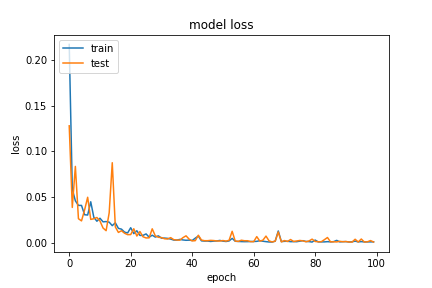

In [34]:
from IPython.display import Image 
model_num_classification="sdd"
data_size_classification=12 #len(data) * 1e-3
epoch_size_classification=100
batch_size_classification=32
learning_rate_classification=1e-3


Image("TrainedModel/cl-model" + str(model_num_classification) + "_" + str(data_size_classification) +
      "t_" + str(epoch_size_classification) + "te_" + str(batch_size_classification) + "_LR" +
      str(learning_rate_classification) + "/plot/loss.png")

The model is splitting data.
It's safe to consider 1e-2 value as the threshold of defining the two categories,above and below this value represents data with and without dust respectively.

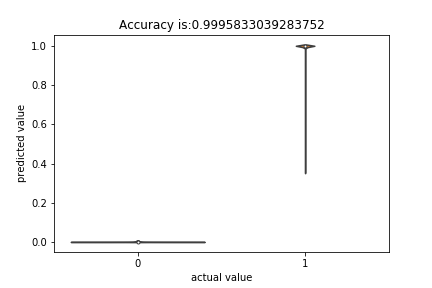

In [41]:
Image("TrainedModel/cl-model" + str(model_num_classification) + "_" + str(data_size_classification) +
      "t_" + str(epoch_size_classification) + "te_" + str(batch_size_classification) +
      "_LR" + str(learning_rate_classification) + "/plot/test_violin_actualvspred.png")

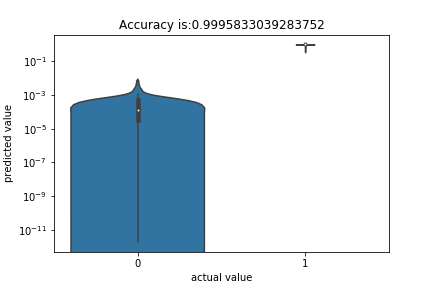

In [42]:
Image("TrainedModel/cl-model" + str(model_num_classification) + "_" + str(data_size_classification) +
      "t_" + str(epoch_size_classification) + "te_" + str(batch_size_classification) +
      "_LR" + str(learning_rate_classification) + "/plot/test_log_violin_actualvspred.png")

## Estimation of dust mass

### Train supernova dust detection model part-2

Implement the classification threshold to Synthetic data, in order to preform the regression on dust mass for objects
that are labeled as dust existance positive.

In [75]:
# %run src/photo_regression_dust

In [52]:
# ##########This cell needs to run once to train "SDD-2" model 

# Classification_threshold=1e-2
# cl_pred=pd.read_pickle("TrainedModel/cl-model" + str(model_num_classification) + "_" +
#                        str(data_size_classification) + "t_" + str(epoch_size_classification) +
#                "te_" + str(batch_size_classification) + "_LR" + str(learning_rate_classification) +
#                        "cl_pred.pkl")
# df_for_reg=cl_pred[cl_pred["cl_pred"]> Classification_threshold]
# index_for_reg=df_for_reg.index
# logflux_reg=logflux.iloc[index_for_reg,:]
# data_reg=data.iloc[index_for_reg,:]


# otherfeatures_data_reg=data_reg[['tempSN', 'radiusSN', 'tempDust']]
# X_data_reg=logflux_reg
# y_data_reg=data_reg["massDust"]

# otherfeatures_data_train_reg, otherfeatures_data_test_reg,\
# X_train_reg, X_test_reg, y_train_reg, y_test_reg\
#     =train_test_split(otherfeatures_data_reg,
#  X_data_reg, y_data_reg,test_size=0.2, random_state=30)



# model_num_regression="sdd"
# data_size_regression=str(len(logflux_reg) *1e-3) 
# epoch_size_regression=5000
# batch_size_regression=32
# learning_rate_regression=1e-3



# NN_reg(X_data_reg,y_data_reg,X_train_reg, y_train_reg, X_test_reg, y_test_reg,
#     otherfeatures_data_train_reg, otherfeatures_data_test_reg, model_num_regression, data_size_regression,
#     epoch_size_regression,
# batch_size_regression,learning_rate_regression)

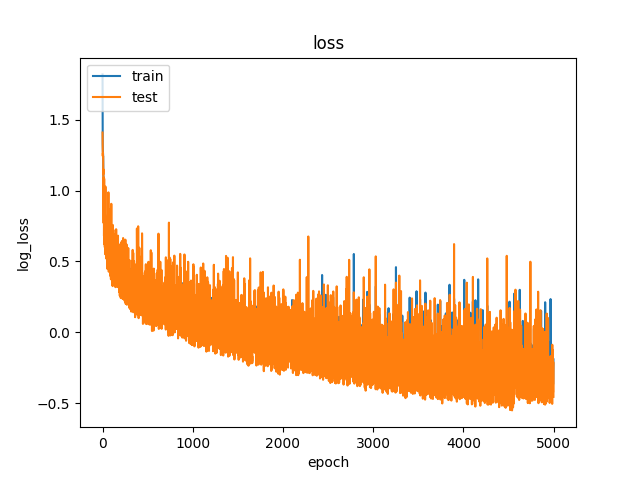

In [60]:
from IPython.display import Image
model_num_regression="sdd"
data_size_regression=str(len(logflux_reg) *1e-3) 
epoch_size_regression=5000
batch_size_regression=32
learning_rate_regression=1e-3

Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/log_loss.png")

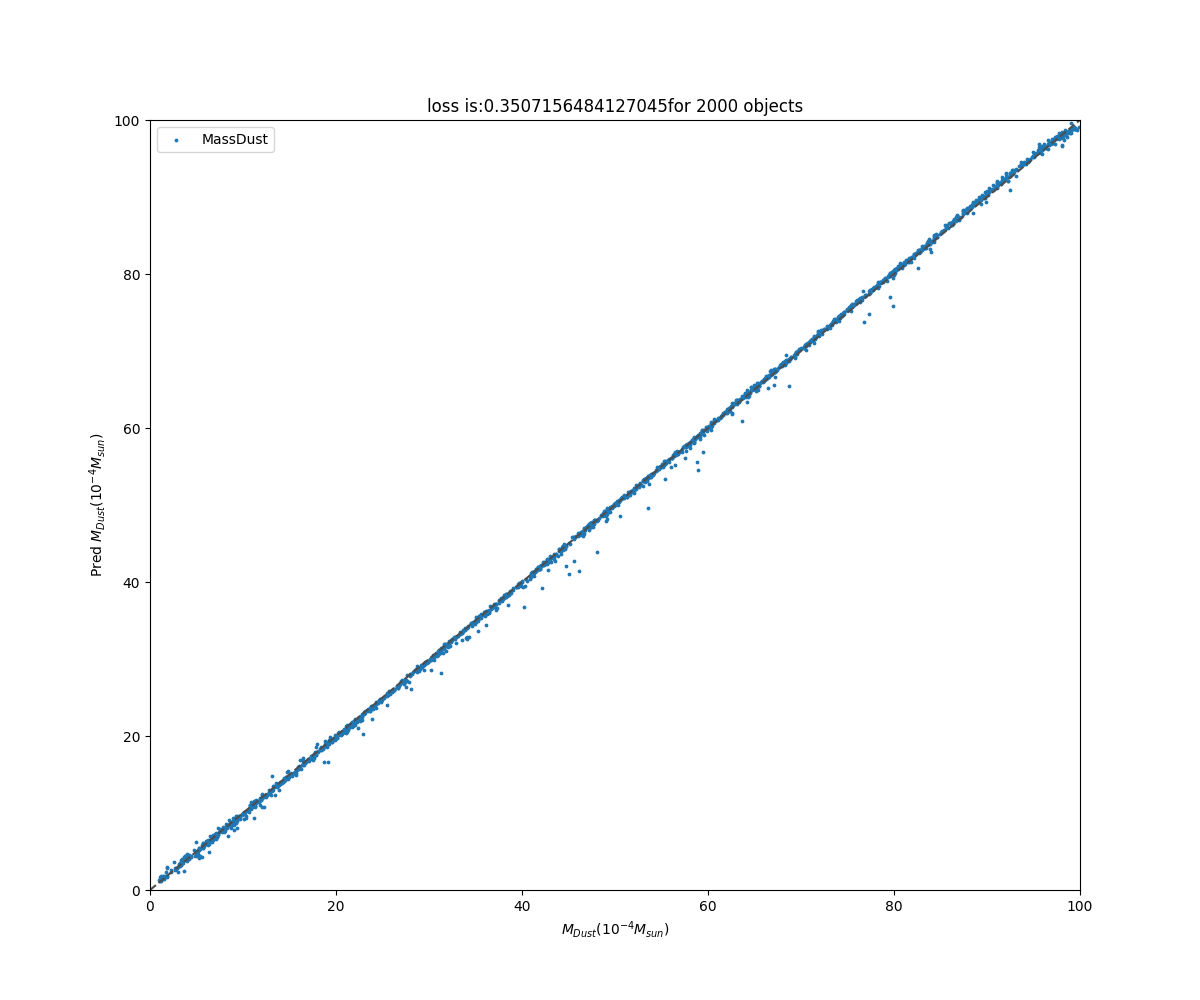

In [61]:
Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/test_actualvspredMassDust.png")

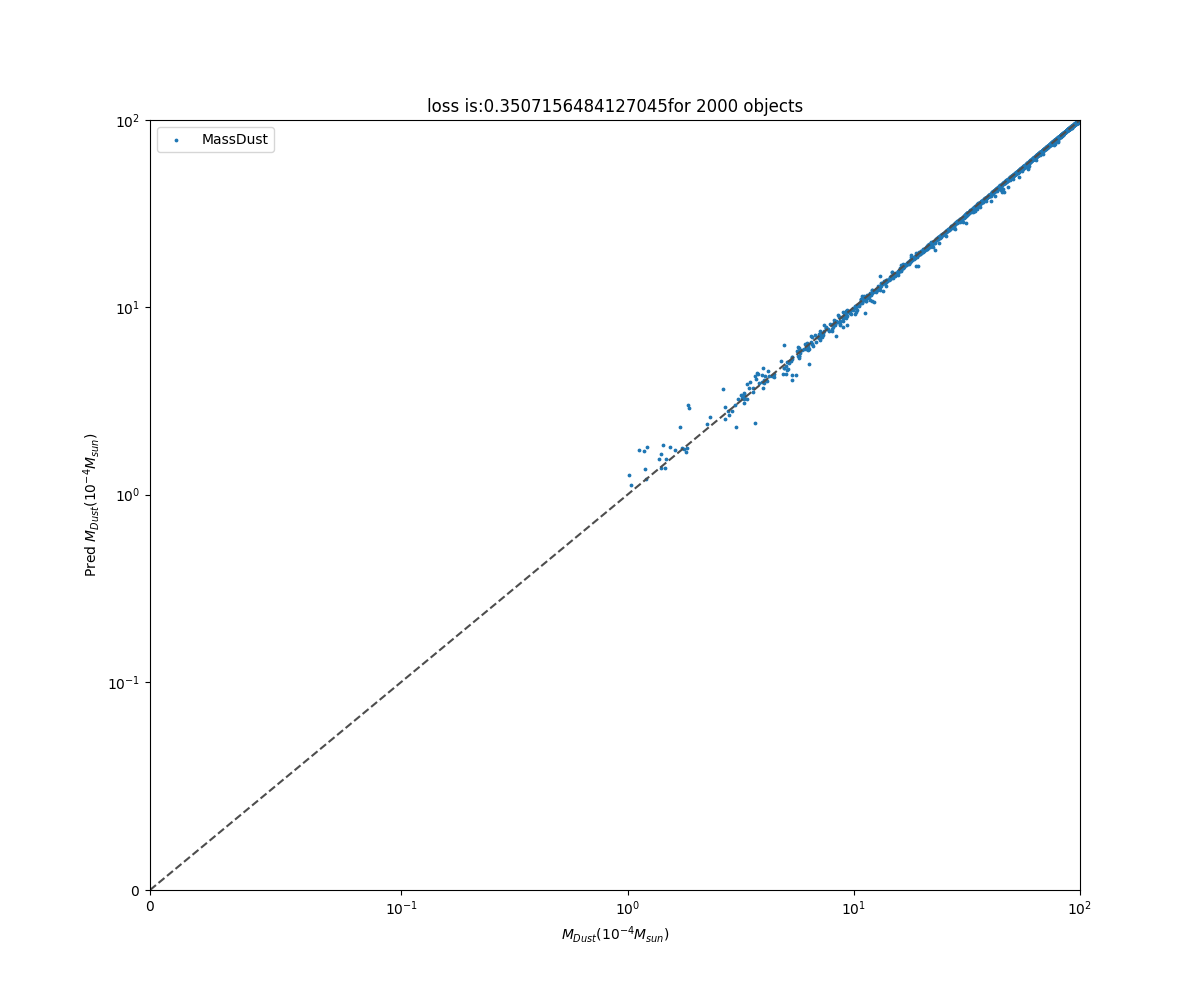

In [62]:
Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/test_Log_actualvspredMassDust.png")

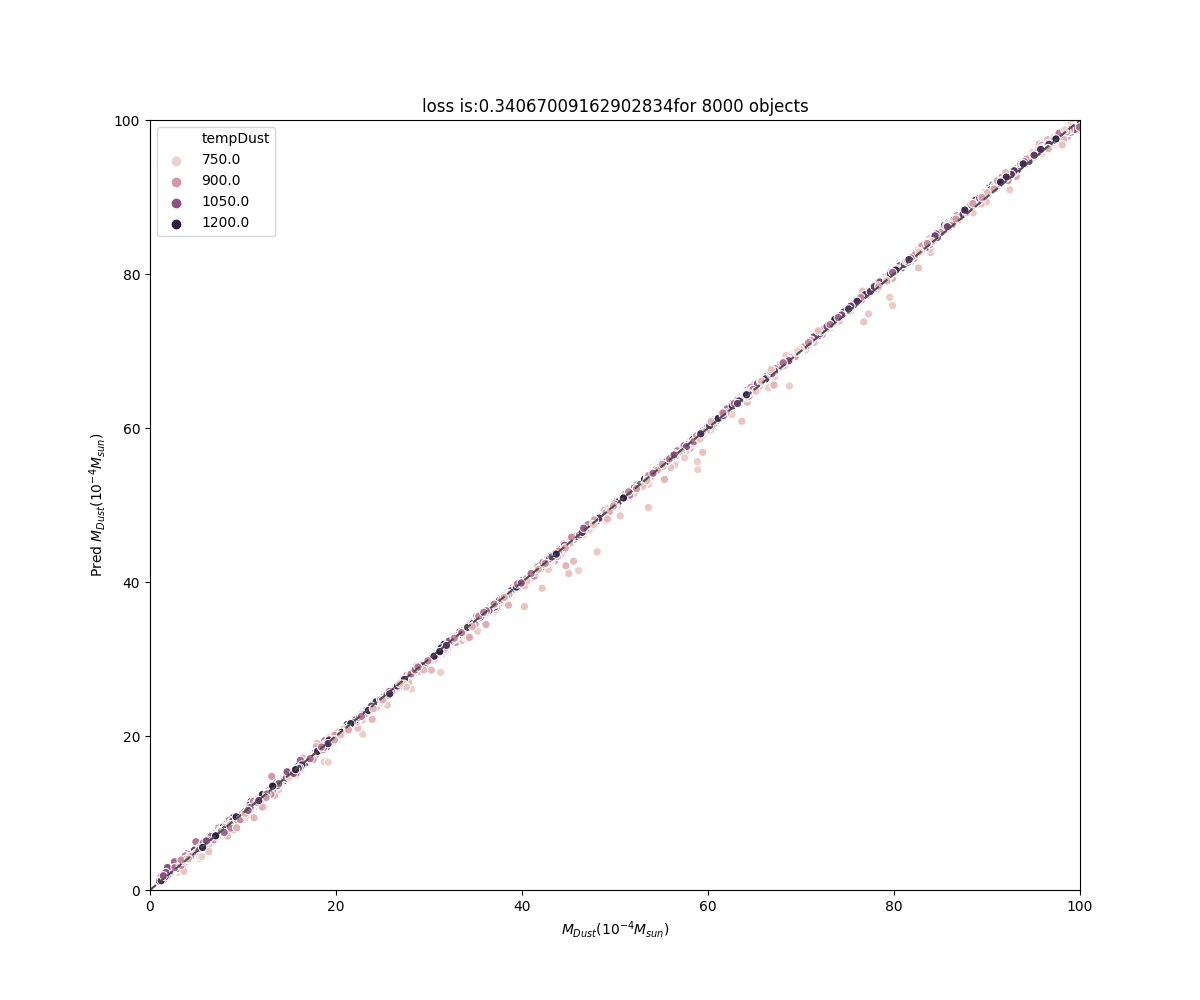

In [63]:
Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/test_actualvspredMassDust_tempDust.png")

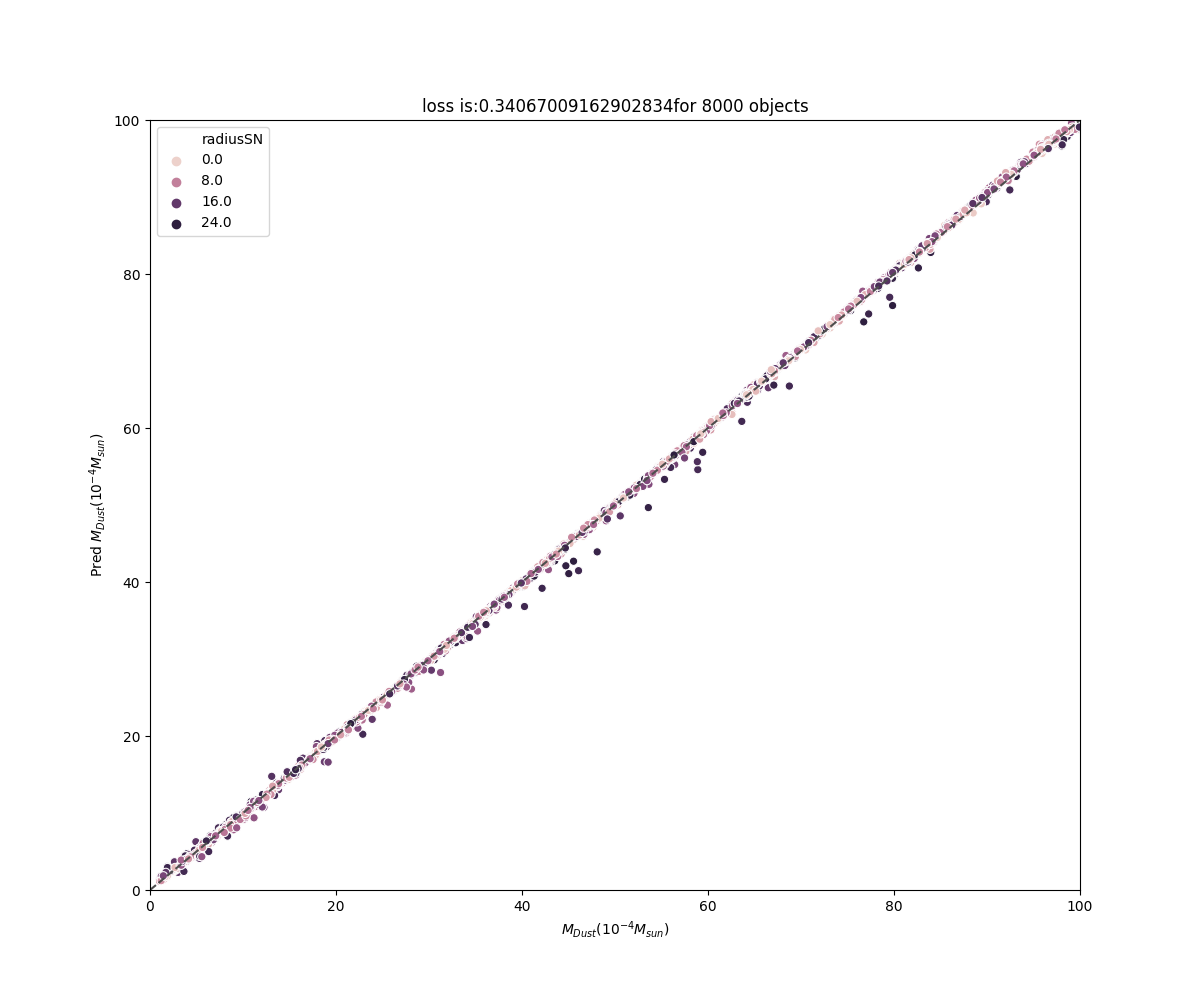

In [64]:
Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/test_actualvspredMassDust_radiusSN.png")

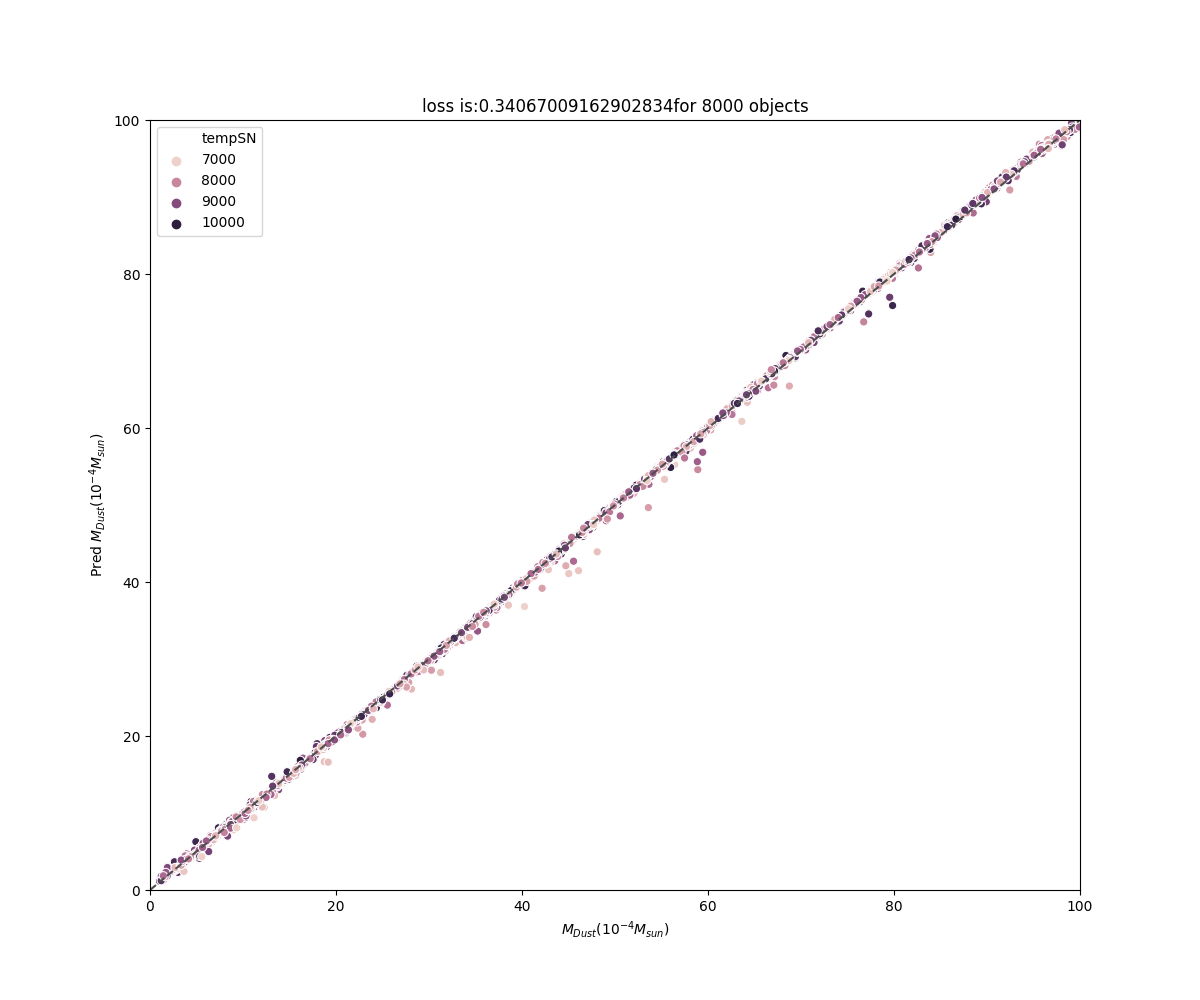

In [65]:
Image("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression) +
      "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + "_LR" +
      str(learning_rate_regression) + "/plot/test_actualvspredMassDust_tempSN.png")

In [ ]:
### accuracy matrix plot

### Predict the dust mass of a new supernova using SDD model

##### The case of 2010jl in an early epoch

In [68]:
####Import a local script
# %run src/Preprocessing_newSpectra
# %run src/photoBands_fromSpectra
# %run src/photometry_filters

In [9]:
###read a spectra
SN_10jl=pd.DataFrame(np.loadtxt('2010jl/T9_FULL_REDUCED_SPECTRUM_ALLARM.txt'))
SN_10jl=SN_10jl.rename(columns={0 : "WL", 1 : "Flux"})
###preprocessing
SN_10jl_adjusted=preprocess_spectra(SN_10jl)
data=SN_10jl_adjusted

wavelength_um=np.array(data["WL"] /1e+4).reshape(1,-1) #data["wavelength_um"]
wavelength=np.array(data["WL"]).reshape(1,-1)
flux=np.array(data["Flux"]).reshape(1,-1)


survey_name="JWST" #excluding F150W2 band
len_data=1#len(wavelength)
filter_logflux_10jl , filters_clWL_10jl=define_filters_flux(survey_name, wavelength, wavelength_um, flux, len_data)
logflux10jl=filter_logflux_10jl.T
logflux10jl.to_pickle("2010jl/log-JWSTbands-2010jl_t9.pkl")

<Figure size 432x288 with 0 Axes>

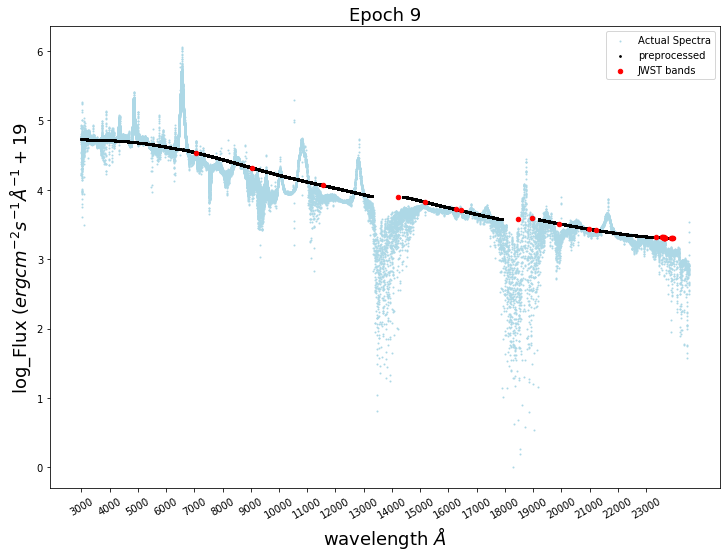

In [10]:
plt.figure(figsize=(12,8.5))
logflux10jl=pd.read_pickle("2010jl/log-JWSTbands-2010jl_t9.pkl")


plt.scatter(SN_10jl["WL"], np.log10(SN_10jl["Flux"])+19, label='Actual Spectra', s=1, color='lightblue')
plt.scatter(SN_10jl_adjusted["WL"], np.log10(SN_10jl_adjusted["Flux"])+19, label='preprocessed', s=3, color='black')
plt.scatter(filters_clWL_10jl[0][0],logflux10jl, label='JWST bands', s=20, color='red')


plt.title("Epoch 9", fontsize=18)
plt.legend()
plt.xlabel(r'wavelength $\AA$', fontsize=18)
plt.ylabel(r'log_Flux ($erg {cm}^{-2} {s}^{-1} {\AA}^{-1} + 19$', fontsize=18)
plt.xticks(np.arange(3000,24000, step=1000), rotation=30)
plt.show()

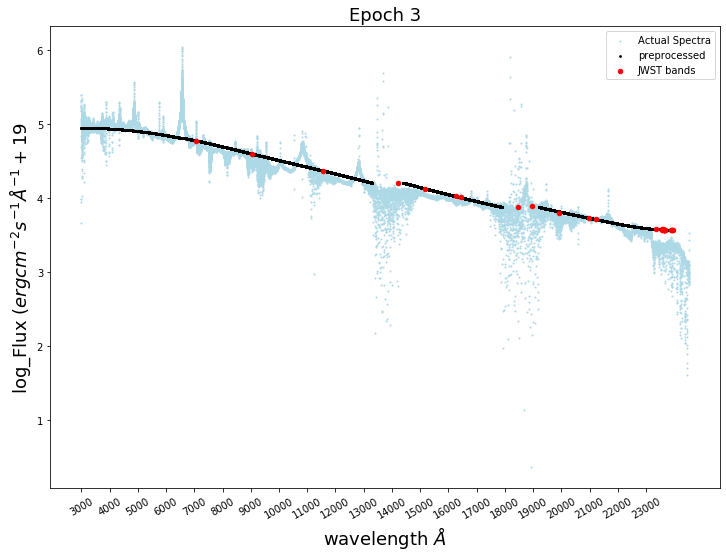

In [8]:
plt.figure(figsize=(12,8.5))
logflux10jl=pd.read_pickle("2010jl/log-JWSTbands-2010jl_t3.pkl")


plt.scatter(SN_10jl["WL"], np.log10(SN_10jl["Flux"])+19, label='Actual Spectra', s=1, color='lightblue')
plt.scatter(SN_10jl_adjusted["WL"], np.log10(SN_10jl_adjusted["Flux"])+19, label='preprocessed', s=3, color='black')
plt.scatter(filters_clWL_10jl[0][0],logflux10jl, label='JWST bands', s=20, color='red')


plt.title("Epoch 3", fontsize=18)
plt.legend()
plt.xlabel(r'wavelength $\AA$', fontsize=18)
plt.ylabel(r'log_Flux ($erg {cm}^{-2} {s}^{-1} {\AA}^{-1}+ 19$', fontsize=18)
plt.xticks(np.arange(3000,24000, step=1000), rotation=30)
plt.show()

## Predict the existance of dust for a new supernova

In [101]:
# ###Check the existance of dust
# ##read the trained sdd-1 model
# model_num_classification="sdd"
# data_size_classification=12 #len(data) * 1e-3
# epoch_size_classification=100
# batch_size_classification=32
# learning_rate_classification=1e-3



# loaded_model = tf.keras.models.load_model("TrainedModel/cl-model" + str(model_num_classification) + "_" + str(data_size_classification)
#                                           + "t_" + str(epoch_size_classification) + "te_" + str(batch_size_classification) + 
#                                           "_LR" + str(learning_rate_classification) + "/model/Dust_NN_.h5")
# logflux10jl=pd.read_pickle("2010jl/log-JWSTbands-2010jl_t3.pkl")
# X_=logflux10jl
# X_ = np.expand_dims(X_, axis=2)
                                          



# result=loaded_model.predict(X_)
# print(result)

## Predict the amount of dust for a new supernova

In [14]:
from mpmath import mp
model_num_regression="sdd"
data_size_regression=10.0#str(len(logflux_reg)) #t
epoch_size_regression=5000
batch_size_regression=32
learning_rate_regression=1e-3
epoch=[3,9]


loaded_model = tf.keras.models.load_model("TrainedModel/reg-model" + str(model_num_regression) + "_" + str(data_size_regression)
                                          + "t_" + str(epoch_size_regression) + "te_" + str(batch_size_regression) + 
                                          "_LR" + str(learning_rate_regression) + "/model/Dust_NN_.h5")

for ep in epoch:
    logflux10jl=pd.read_pickle("2010jl/log-JWSTbands-2010jl_t"+str(ep)+".pkl")
    X_=logflux10jl
    X_ = np.expand_dims(X_, axis=2)




    result=loaded_model.predict(X_)
    print("Predicted Dust mass for 2010jl in epoch ",str(ep)," : ",int(result), "x", mp.power(10, -4), "M_sun")

Predicted Dust mass for 2010jl in epoch  3  :  4 x 0.0001 M_sun
Predicted Dust mass for 2010jl in epoch  9  :  10 x 0.0001 M_sun
